# Hotel Reservation Cancellation Analyst (Based on Final Project)
**By: Hudzaifah Rizqi Kamil**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Dataset
**Source: https://www.kaggle.com/datasets/mojtaba142/hotel-booking**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing DS Bootcamp/Final Project/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Data Description

In [4]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

(None, (119390, 36))

Conclusion of the dataset:

1. The dataset has 119390 observation records with **35 columns (feature) + 1 column (target)**
2. Data types in the dataset: **int64**, **float64** and **object**

## Data Preprocessing

### Checking Unique Value

In [5]:
# Check all unique values ​​in each feature column
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

From the results of the unique value column check:

1. There is a value **'Undefined'** in the `meal`, `market_segment`, `distribution_channel` features. Further analysis is needed whether this value will be handled or not.
2. For the `agent` and `company` columns, the data type is **'float64'**, it is easier if it is changed to **'int64'**.
3. Features that indicate the number of guests (adults, children, babies) need further analysis if there is anomalous data.
4. Features that refer to guest privacy (`name`, `email`, `phone-number`, and `credit_card`) are better deleted because they were originally created with dummies and do not affect the purpose of the analysis.

In [6]:
# remove features that contain privacy data
df = df.drop(columns=['name','email','phone-number','credit_card'])

### Missing Value

In [7]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


There are missing values ​​in the feature columns: `children`, `country`, `agent`, and `company`. To handle missing values, value imputation is performed:
- **imputation of zero values** ​​to `children`, `agent`, and `company`
  - childern : Filled with 0, indicates the guest does not bring children
  - agent    : Filled with 0, indicating that the guest made the reservation independently
  - company  : Filled with 0, indicating that the guest is not from a company. All booking costs are borne independently
- imputation of **'Undefined'** to missing values ​​in the `country` column indicating the guest's country of origin is unknown

### Duplicated Data

In [8]:
df.duplicated().sum()

np.int64(31994)

Duplicate data is identified based on the similarity of all values ​​in one observation. Guest name is not used as the primary key because of the assumption that one individual can make multiple reservations at once with the same name or reservations occur at the same time, but with different reservation details or vice versa. Therefore:

1. The large number of duplicate data deletions will affect the statistical value and analysis in the data.
2. There is no feature column that can be used with certainty as a unique value to identify the data index. then **no need to delete duplicate data**.

### Numerical Feature Analysis

#### Statistical Descriptive

In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2016.16,0.71,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


From the descriptive statistics results, it was found that there was a negative value in the `adr` column (***Averange Daily Rate***). This is an anomaly that must be dropped.

#### Feature Distribution

In [10]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

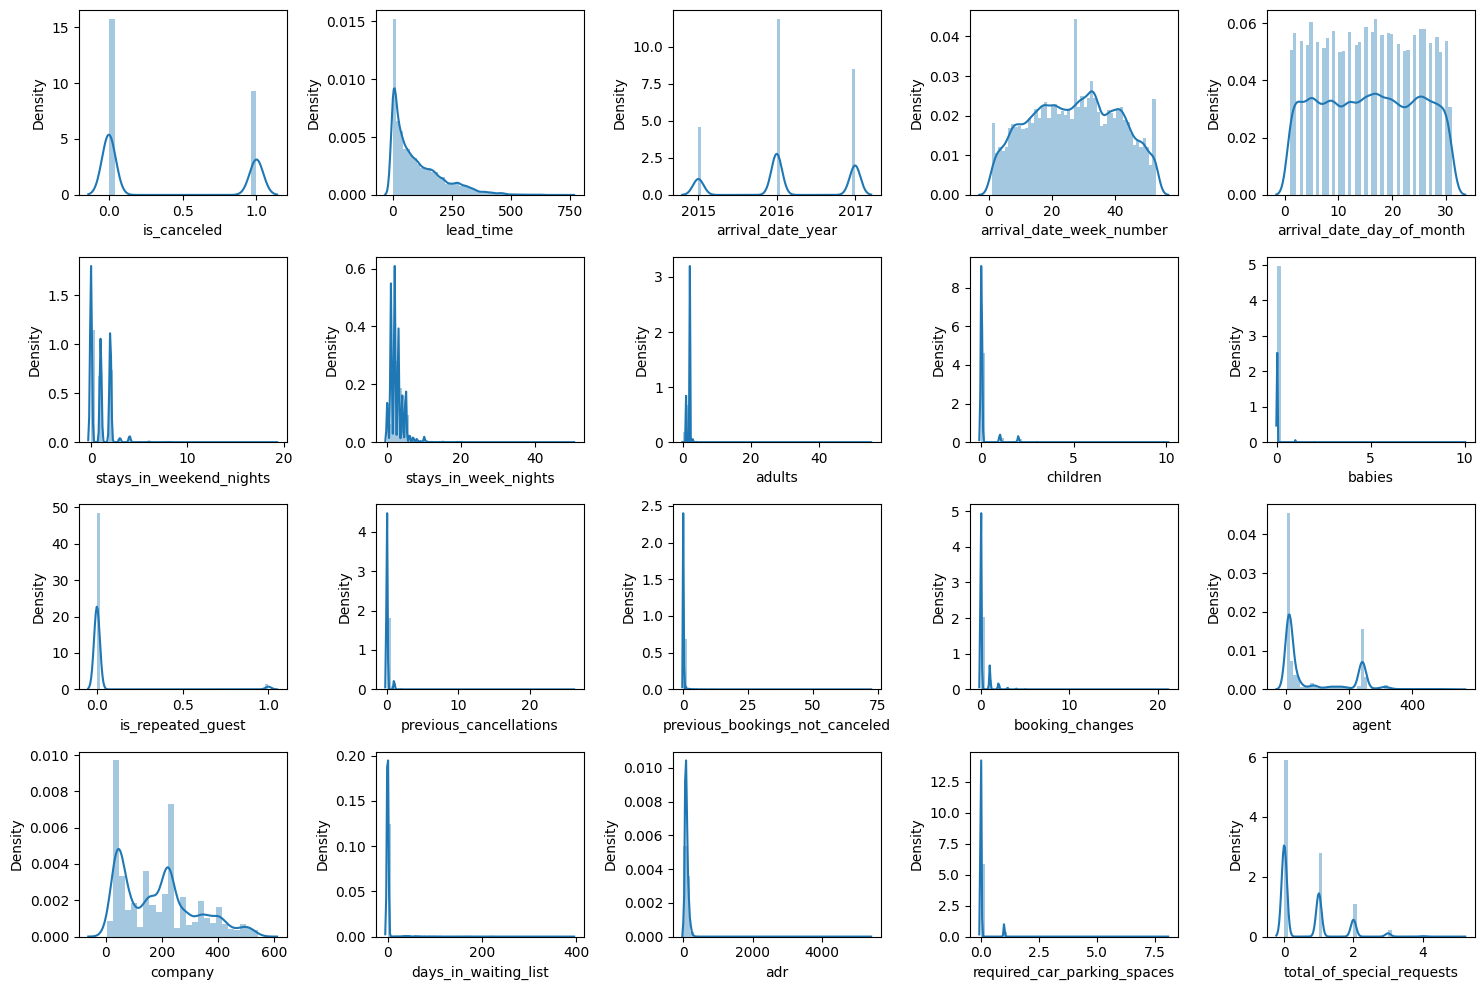

In [11]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

From the graphic results above, it is known that the majority of the distribution of numeric features tends to be ***positively skewed***. While in the `arrival_date_week_number` and `arrival_date_day_of_month` columns, the distribution tends to be normal.

#### Checking Outliers

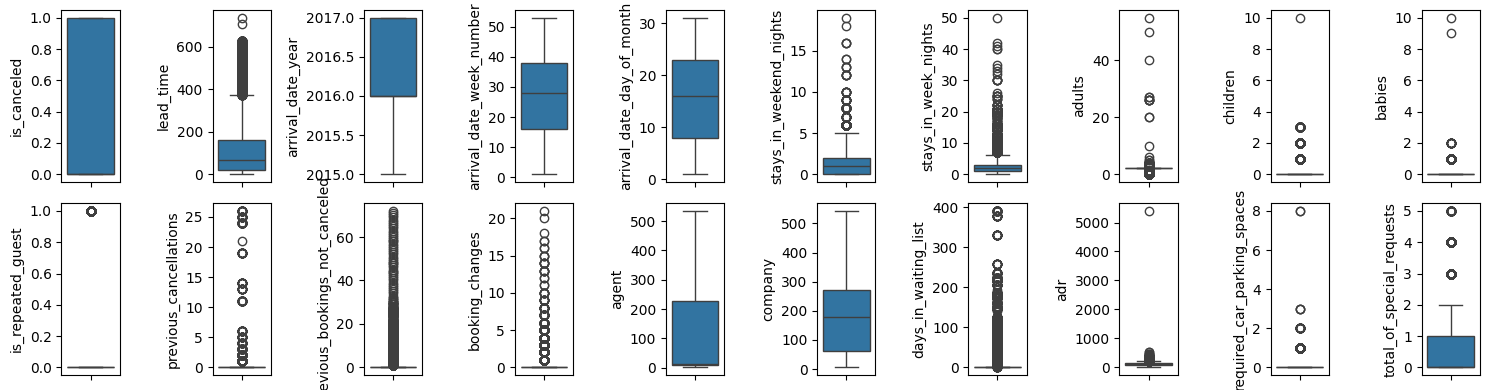

In [12]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

From the Boxplot results above, it is known:
1. Overall, the majority of numeric features have outliers. Therefore, it is necessary to re-analyze whether the value is still included in the relevant data collection results in the field (hotel booking history).
2. There is an ***Extreme Value*** (a value that is very far from the boxplot limit value) in the `children`, `babies`, `adr`, and `required_car_parking_spaces` features.

Therefore, handling outliers will be done by removing the extreme value only so as not to reduce the insight generated.

#### Anomaly Data

Finds anomalous values ​​from the guest count data in each track record in the hotel booking history. *A booking is booked, but no guest is occupying the room.

In [13]:
# Sum all guests in one booking index
guest_0 = df['adults'] + df['children'] + df['babies']
# Check if there are any rooms booked, but empty (no number of guests included in the booking)
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

From the coding results above, it is known that there are **180 rooms that are not occupied by guests (empty)**. Although with the assumption that reservations are still made so that they can be used by prospective guests as spare rooms (eg: groups if they feel there are not enough rooms from the initial reservation), this causes the hotel staff to be unable to work effectively because they cannot estimate the operational costs that must be incurred for the empty rooms. For handling, it will be dropped.

### Categorical Feature Analysis

#### Statistical Distribution

In [14]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


#### Feature Distribution

In [15]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()

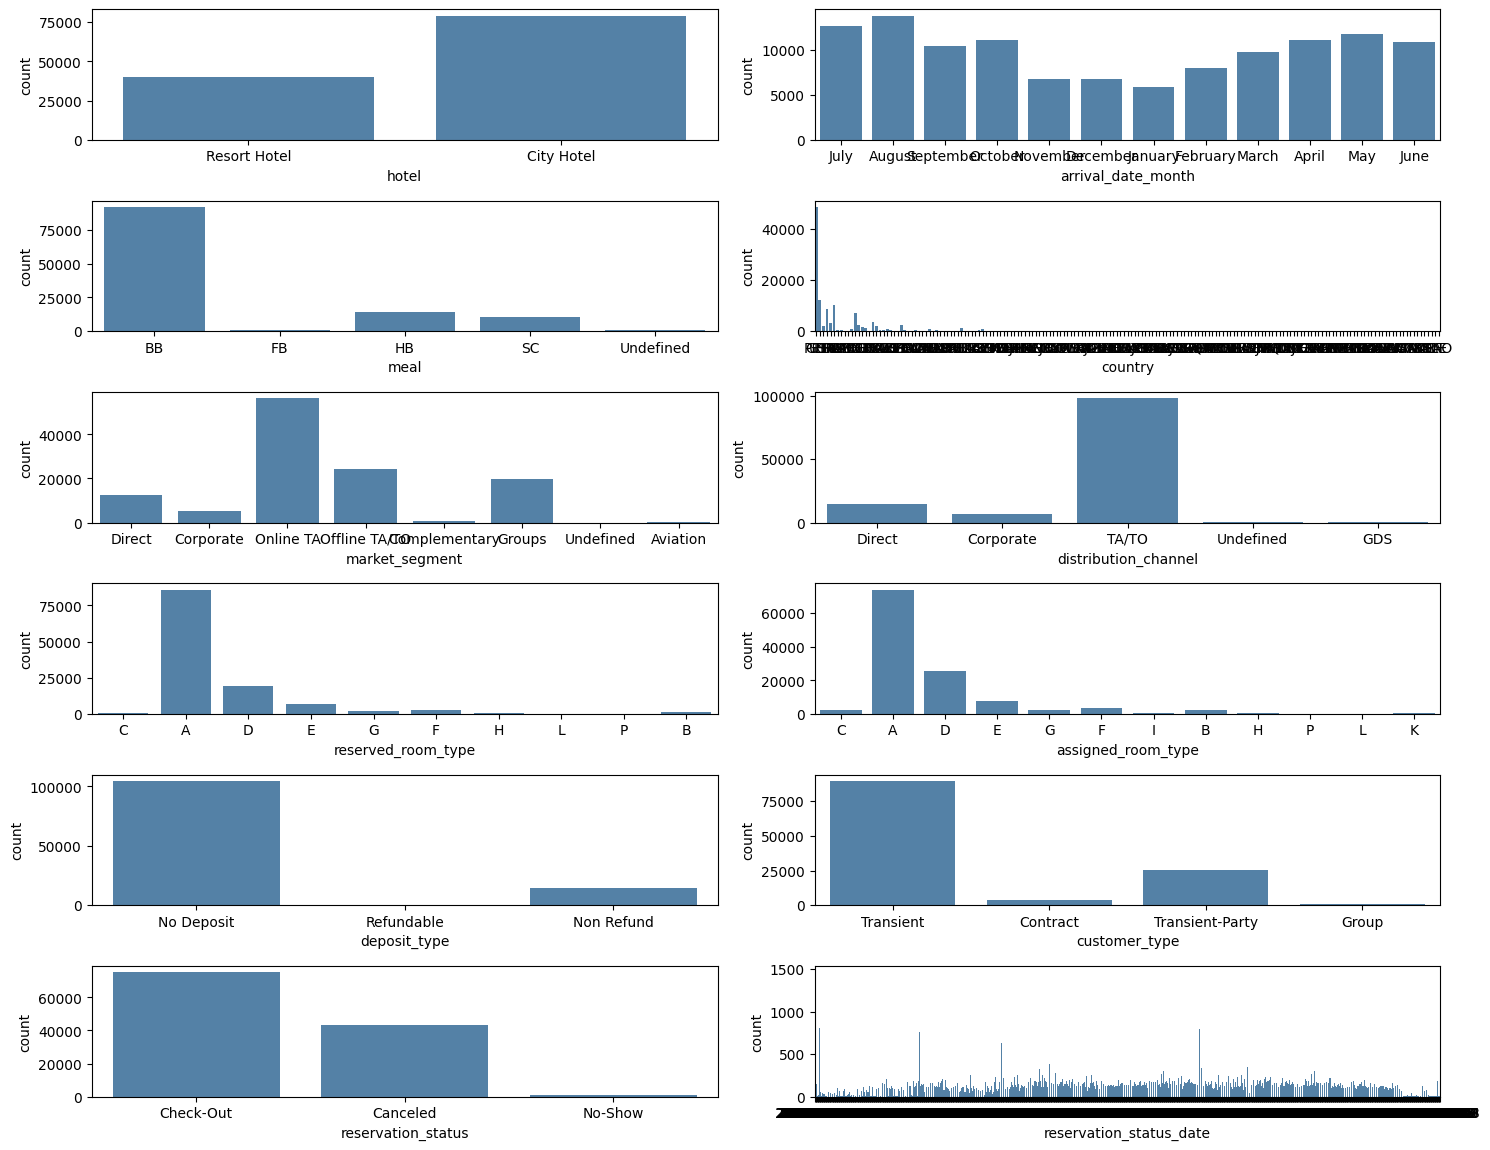

In [16]:
plt.figure(figsize=(15, 15))

# Adjust the subplot grid to accommodate all categorical features
# The grid should have enough space for all plots
# For 16 plots, you could use a 4x4 grid, 8x2 grid, or another suitable configuration.

# Example using a 8x2 grid:
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

### Data Cleansing

In [17]:
df_clean = df.copy()

#### Handling Missing Value

There are four feature columns that have *missing value*, namely `children`, `country`, `agent`, and `company`, the following actions will be taken:
1. Missing value in the `children` column **filled with 0**, indicating that the guest does not bring children.
2. Missing value in the `agent` column **filled with 0**, indicating that the guest made the reservation independently or not through an agent.
3. Missing value in the `company` column **filled with 0**, indicating that the guest does not come from a company or all booking costs during their stay at the hotel are borne independently.
4. Missing value in the `country` column **filled with 'Undefined'**, indicating that the guest's country of origin is unknown.

In [18]:
# Handling Missing Value
# Point 1, 2, and 3
ft = ['children', 'agent', 'company']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# Point 4
df_clean['country'].fillna('Undefined', inplace=True)

In [19]:
# Number of Missing Values ​​in the entire dataset
df_clean.isna().sum().sum()

np.int64(0)

#### Handling Duplicated Data

Based on the previous analysis, duplicate data will not be deleted because:
1. The number of duplicate data that must be deleted is quite large so that it is feared to affect the statistical value of the analysis and data quality for the formation of a machine learning prediction classification model.
2. There is no feature column that can be used with certainty as a unique value to identify the data index. then **no need to delete duplicate data**

#### Handling Inconsistent and Extreme Values

At this stage, inconsistent data (inappropriate data types, and class categories in features that need to be clarified) and extreme values ​​in feature columns will be handled as follows:

- The `Meal` feature can be categorized into two classes, namely **'With Meal'** and **'No Meal'** with the following descriptions:
1. **With Meal:** BB, HB, and FB
2. **No Meal:** SC/Undefined

In [20]:
df_clean['meal'] = df_clean['meal'].apply(lambda x: 'With Meal' if x in ['BB', 'HB', 'FB'] else 'No Meal')

In [21]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

In [22]:
df_clean['meal'].value_counts()

,count
meal,
With Meal,107571
No Meal,11819


- The `children` feature column should use the **'int64'** data type.

In [23]:
df_clean['children'] = df_clean['children'].astype('int64')

- Removed extreme values ​​in feature columns: `children`, `babies`, `adr`, and `required_car_parking_spaces`.

In [24]:
# Removing extreme values ​​based on boxplot results in numeric column analysis
# Feature `children`
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# Feature 'babies'
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# Feature `adr`
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

# Feature `required_car_parking_spaces`
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

- Remove anomalous values ​​on empty rooms from reservation bookings (without guests).

In [25]:
# No guests
index_guest_0 = df_clean['adults'] + df_clean['children'] + df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

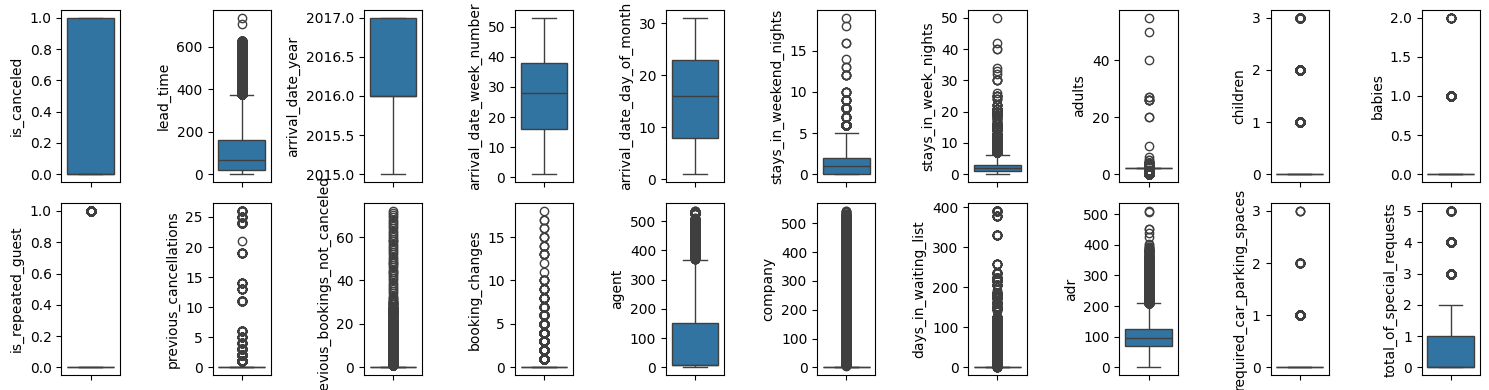

In [26]:
# Rechecking outliers on numeric features
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

In [27]:
df_clean.isna().sum().sum()

np.int64(0)

In [28]:
df_clean.duplicated().sum()

np.int64(31980)

In [29]:
print('Total Index sebelum proses Cleaning :', df.shape[0])
print('Total Index setelah proses Cleaning :', df_clean.shape[0])

Total Index sebelum proses Cleaning : 119390
Total Index setelah proses Cleaning : 119203


After going through the Cleaning process, the data has been cleaned from missing values ​​and maintains duplicate values ​​with considerations that have been analyzed to maintain important information, making the size of the dataset index which was originally 119390 to 119203 or a data loss rate of 0.16%.

In [30]:
# from google.colab import files

# data cleaning result file name
# excel_name = 'pengolahan_data_reservasi.xlsx'

# df_clean.to_excel(excel_name, index=False)
# files.download(excel_name)

## Descriptive Analysis

Calculate basic statistics to compare the two hotel types:

- **Cancellation rate** (total_cancellations / total_bookings) per hotel type.
- **Distribution of cancellation times** (e.g. how many days before check-in did cancellations occur). `lead_time`
- **Average length of stay** (do cancelers tend to book longer/shorter stays?). `stays_in_weekend_night`s and `stays_in_week_nights`
- **Seasonality** (Are there any patterns in cancellations by month/holiday?). `reservation_status_date` + `adr`

In [31]:
df_da = df_clean.copy()

In [32]:
# Total number of reservation cancellations
cancel_count = df_da['is_canceled'].value_counts()
cancel_count

,count
is_canceled,
0,75006
1,44197


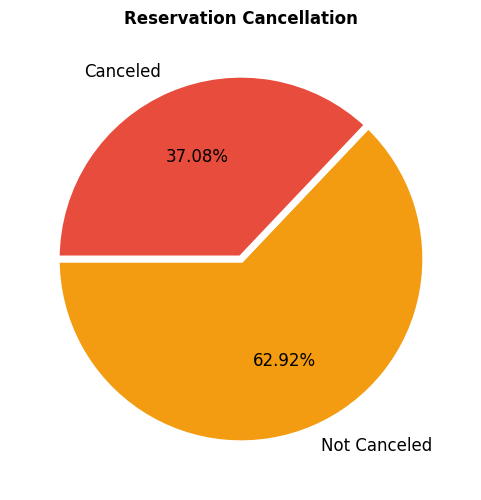

In [33]:
plt.subplots(figsize=(6, 6))
labels = ['Not Canceled', 'Canceled']
colors = ['#F39C12', '#E74C3C'] # Can be filled with Hex color codes
plt.pie(cancel_count,
        labels=labels,
        autopct='%.2f%%',
        wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'},
        colors=colors,
        textprops={'size': 'large'},
        startangle=180)

plt.title('Reservation Cancellation', fontsize=12, pad=3, loc='center', fontweight='bold')
plt.show()

**- Cancellation rates by hotel type**

In [34]:
# Number of cancellations by hotel type
cancel_hotel = df_da.groupby('hotel')['is_canceled'].value_counts()
cancel_hotel

hotel         is_canceled
City Hotel    0              46082
              1              33078
Resort Hotel  0              28924
              1              11119
Name: count, dtype: int64

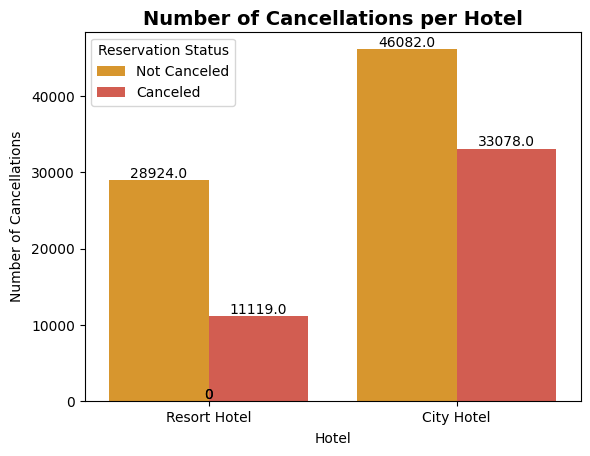

In [35]:
sns.countplot(x='hotel', hue='is_canceled', data=df_da, palette=colors)
plt.title('Number of Cancellations per Hotel', fontsize=14, pad=5, loc='center', fontweight='bold')
plt.xlabel('Hotel', labelpad=5)
plt.ylabel('Number of Cancellations', labelpad=5)
plt.legend(title='Reservation Status', labels=labels, loc='upper left')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [36]:
# Separate data for each hotel type
city_hotel = df_da[df_da['hotel'] == 'City Hotel']
resort_hotel = df_da[df_da['hotel'] == 'Resort Hotel']

In [37]:
city_hotel.shape, resort_hotel.shape

((79160, 32), (40043, 32))

In [38]:
# Total number of reservation cancellations for city hotel
cancel_count_ch = city_hotel['is_canceled'].value_counts()
cancel_count_ch

,count
is_canceled,
0,46082
1,33078


In [39]:
# Total number of reservation cancellations for resort hotel
cancel_count_rh = resort_hotel['is_canceled'].value_counts()
cancel_count_rh

,count
is_canceled,
0,28924
1,11119


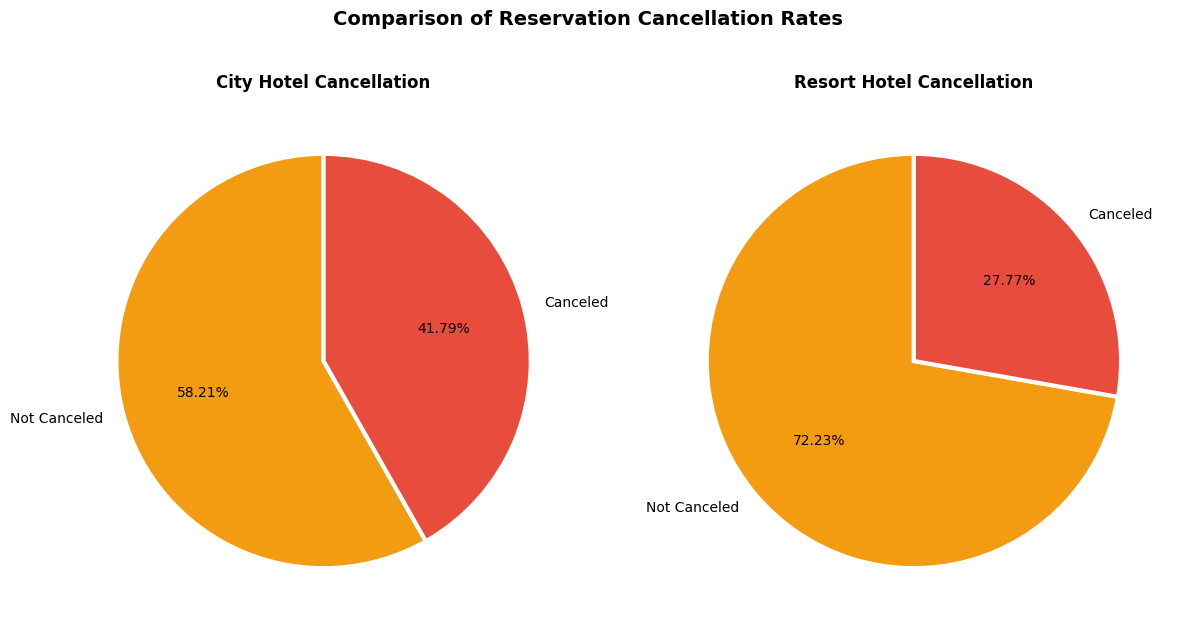

In [40]:
# Set colors and labels
labels = ['Not Canceled', 'Canceled']
colors = ['#F39C12', '#E74C3C']


# Create a figure with 2 subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for City Hotel
ax1.pie(
    cancel_count_ch,
    labels=labels,
    autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors=colors,
    textprops={'size': 'medium'},
    startangle=90
)
ax1.set_title('City Hotel Cancellation', fontweight='bold', pad=10)

# Pie chart for Resort Hotel
ax2.pie(
    cancel_count_rh,
    labels=labels,
    autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors=colors,
    textprops={'size': 'medium'},
    startangle=90
)
ax2.set_title('Resort Hotel Cancellation', fontweight='bold', pad=10)

# Set the main title
plt.suptitle('Comparison of Reservation Cancellation Rates', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()  # To avoid overlapping
plt.show()

**- Cancellation rate based on the length of time delay from booking to arrival**

In [41]:
def categorize_lead_time(lead_days):
    if lead_days <= 7:
        return '0-7 days (1 week)'
    elif lead_days <= 30:
        return '8-30 days (~1 month)'
    elif lead_days <= 90:
        return '31-90 days (1-3 months)'
    else:
        return '>90 days (3+ months)'

# Terapkan ke kedua dataset
city_hotel['lead_time_category'] = city_hotel['lead_time'].apply(categorize_lead_time)
resort_hotel['lead_time_category'] = resort_hotel['lead_time'].apply(categorize_lead_time)

In [42]:
# City Hotel
cancel_by_lead_city = city_hotel[city_hotel['is_canceled'] == 1]['lead_time_category'].value_counts()

# Resort Hotel
cancel_by_lead_resort = resort_hotel[resort_hotel['is_canceled'] == 1]['lead_time_category'].value_counts()

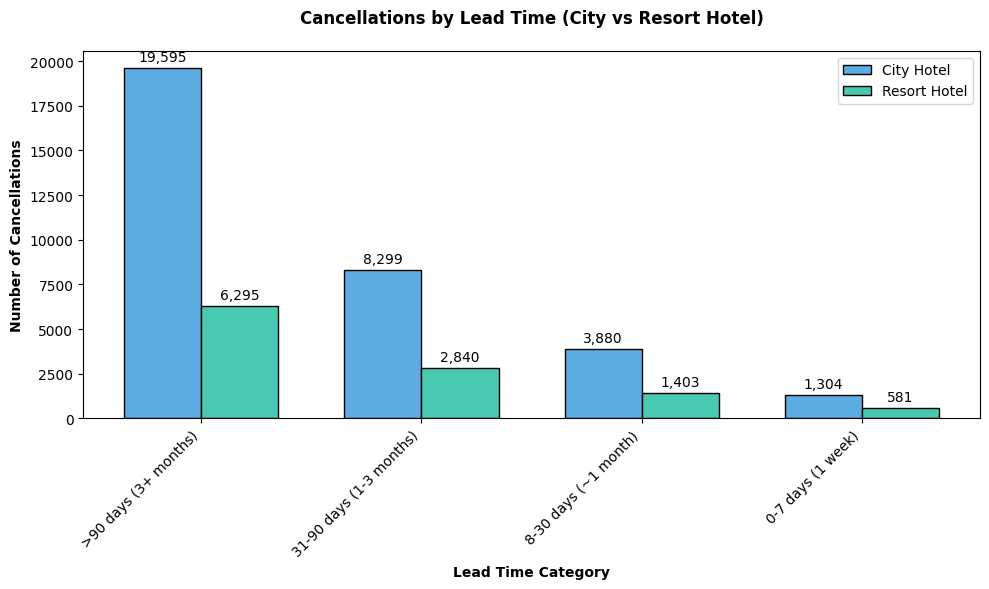

In [43]:
# Data
categories = cancel_by_lead_city.index
city_counts = cancel_by_lead_city.values
resort_counts = cancel_by_lead_resort.values

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(categories))

bars1 = ax.bar(x - bar_width/2, city_counts, bar_width,
               label='City Hotel', color='#5DADE2', edgecolor='black')
bars2 = ax.bar(x + bar_width/2, resort_counts, bar_width,
               label='Resort Hotel', color='#48C9B0', edgecolor='black')

# Customisasi
ax.set_xlabel('Lead Time Category', fontweight='bold')
ax.set_ylabel('Number of Cancellations', fontweight='bold')
ax.set_title('Cancellations by Lead Time (City vs Resort Hotel)', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Tambahkan label nilai di atas bar
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Main Cancellation Pattern**
- Trend: The longer the lead time, the higher the risk of cancellation** (especially City Hotels).
- The lowest cancellations occurred in periods of a week or less (0-7 days) for both City Hotels and Resort Hotels.

**Comparison Between Hotel Types**
**City Hotels** have 3x more cancellations than Resort Hotels for long lead times (>280 days).

Potential causes:
- Business guests: Dynamic travel plans (e.g. meeting schedules change).
- Overbooking: Early bookings as a “placeholder”.

**Resort Hotels** are more stable across all categories, but cancellations peak at >280 days.

In [44]:
# City Hotel
total_bookings_city = city_hotel['lead_time_category'].value_counts()
cancel_rate_city = (cancel_by_lead_city / total_bookings_city * 100).round(2)

# Resort Hotel
total_bookings_resort = resort_hotel['lead_time_category'].value_counts()
cancel_rate_resort = (cancel_by_lead_resort / total_bookings_resort * 100).round(2)

<Axes: ylabel='lead_time_category'>

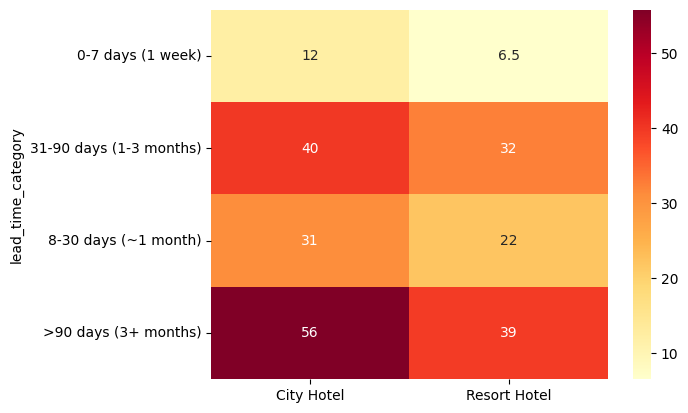

In [45]:
pivot_table = pd.DataFrame({
    'City Hotel': cancel_rate_city,
    'Resort Hotel': cancel_rate_resort
})
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd')

**Key Patterns:**

1. The longer the lead time, the higher the cancellations for both hotels.

2. City Hotels consistently have a higher cancellation percentage than Resort Hotels across all categories.

**- Cancellation rate based on average length of stay**

In [46]:
# Calculate total nights stay
df_da['total_nights'] = df_da['stays_in_week_nights'] + df_da['stays_in_weekend_nights']

# Categorize duration (example: short, medium, long)
def categorize_stay(nights):
    if nights <= 2:
        return 'Short stay (1-2 nights)'
    elif nights <= 5:
        return 'Medium stay (3-5 nights)'
    else:
        return 'Long stay (6+ nights)'

df_da['stay_category'] = df_da['total_nights'].apply(categorize_stay)

In [47]:
# Separate data
city_hotel = df_da[df_da['hotel'] == 'City Hotel']
resort_hotel = df_da[df_da['hotel'] == 'Resort Hotel']

# Calculate total cancellations per duration category
def calculate_cancel_stats(data):
    canceled_data = data[data['is_canceled'] == 1]
    stats = canceled_data['stay_category'].value_counts().reindex(
        ['Short stay (1-2 nights)', 'Medium stay (3-5 nights)', 'Long stay (6+ nights)']
    ).fillna(0)
    return stats

city_cancel_stats = calculate_cancel_stats(city_hotel)
resort_cancel_stats = calculate_cancel_stats(resort_hotel)

In [48]:
# Calculate total bookings per duration category (for normalization)
city_total_bookings = city_hotel['stay_category'].value_counts().reindex(
    ['Short stay (1-2 nights)', 'Medium stay (3-5 nights)', 'Long stay (6+ nights)']
)
resort_total_bookings = resort_hotel['stay_category'].value_counts().reindex(
    ['Short stay (1-2 nights)', 'Medium stay (3-5 nights)', 'Long stay (6+ nights)']
)

# Calculate the cancellation percentage
city_cancel_rate = (city_cancel_stats / city_total_bookings * 100).round(2)
resort_cancel_rate = (resort_cancel_stats / resort_total_bookings * 100).round(2)

In [49]:
result = pd.DataFrame({
    'City Hotel (Count)': city_cancel_stats,
    'City Hotel (%)': city_cancel_rate,
    'Resort Hotel (Count)': resort_cancel_stats,
    'Resort Hotel (%)': resort_cancel_rate
})
print(result)

                          City Hotel (Count)  City Hotel (%)  \
stay_category                                                  
Short stay (1-2 nights)                14547           41.64   
Medium stay (3-5 nights)               16110           41.41   
Long stay (6+ nights)                   2421           45.48   

                          Resort Hotel (Count)  Resort Hotel (%)  
stay_category                                                     
Short stay (1-2 nights)                   2907             20.26  
Medium stay (3-5 nights)                  4257             32.00  
Long stay (6+ nights)                     3955             31.91  


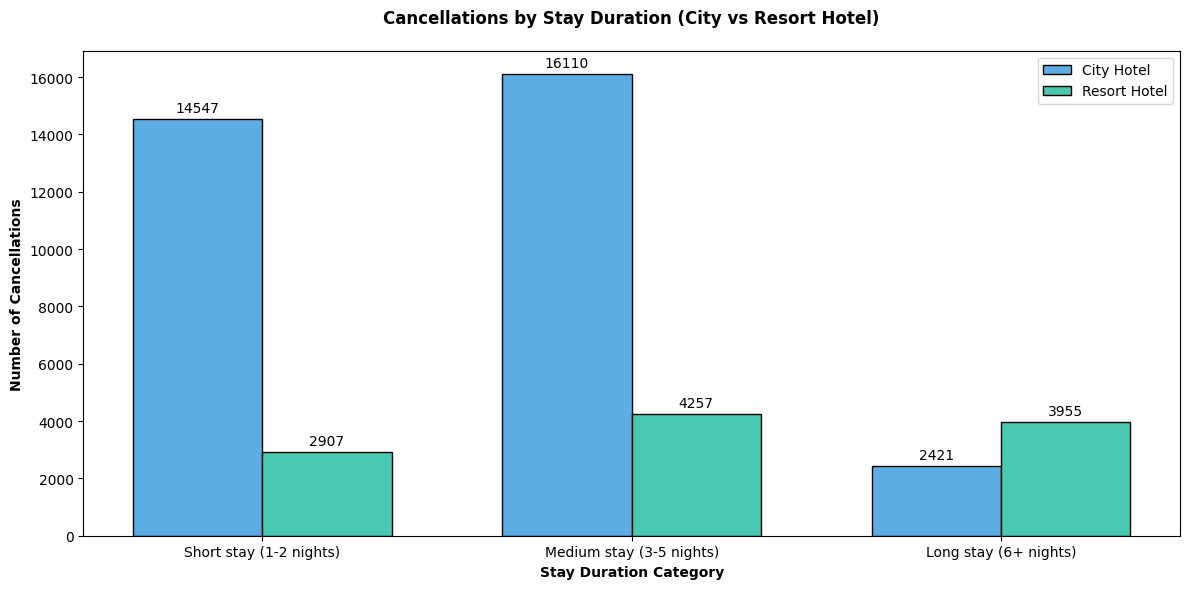

In [50]:
# Comparative visualization
categories = result.index
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, result['City Hotel (Count)'], width,
               label='City Hotel', color='#5DADE2', edgecolor='black')
bars2 = ax.bar(x + width/2, result['Resort Hotel (Count)'], width,
               label='Resort Hotel', color='#48C9B0', edgecolor='black')

ax.set_xlabel('Stay Duration Category', fontweight='bold')
ax.set_ylabel('Number of Cancellations', fontweight='bold')
ax.set_title('Cancellations by Stay Duration (City vs Resort Hotel)', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0, ha='center')
ax.legend()

# Add value labels above the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

**1. Main Cancellation Pattern**

**- City Hotel:**
Highest cancellations for short stays (1-2 nights): 14,547 cases (the highest absolute number among all categories).

*Possible causes:*
- Business guests who frequently change their schedules at the last minute.
- Impulse bookings without strong commitments.

**- Resort Hotel:**
Cancellations were dominant in medium stays (3-5 nights): 3,955 cases, indicating vacationers tend to cancel medium plans.

*Potential reasons:*
- Changes in family/group vacation plans.
- Dissatisfaction with price or amenities after initial booking.


**2. Comparison Between Hotel Types**
- **City Hotels** have higher cancellation rates across all categories than Resort Hotels:
-- Short stay: 14,547 vs 2,907 (5x more!). This is consistent with the more dynamic nature of business guests.

- **Resort Hotels** show a progressive increase in cancellations with duration:
-- From 2,907 (short stay) → 3,955 (medium stay). Indication: Guests plan long vacations but often cancel.

**- Analysis of Number of Cancellations per Month + ADR (July 2015 - August 2017)**

In [51]:
# Make sure the date column is in datetime format.
df_da['reservation_status_date'] = pd.to_datetime(df_da['reservation_status_date'])

In [52]:
# Filter data for 2015-2017
df_filtered = df_da[(df_da['reservation_status_date'].dt.year >= 2015) & (df_da['reservation_status_date'].dt.year <= 2017)].copy()

# Create month-year column from filtered data
df_filtered['month_year'] = df_filtered['reservation_status_date'].dt.to_period('M').astype(str)

# Calculate metrics
metrics_filtered = df_filtered.groupby(['hotel', 'month_year']).agg(
    total_booking=('is_canceled', 'size'),
    total_canceled=('is_canceled', 'sum'),
    avg_adr=('adr', 'mean')
).reset_index()

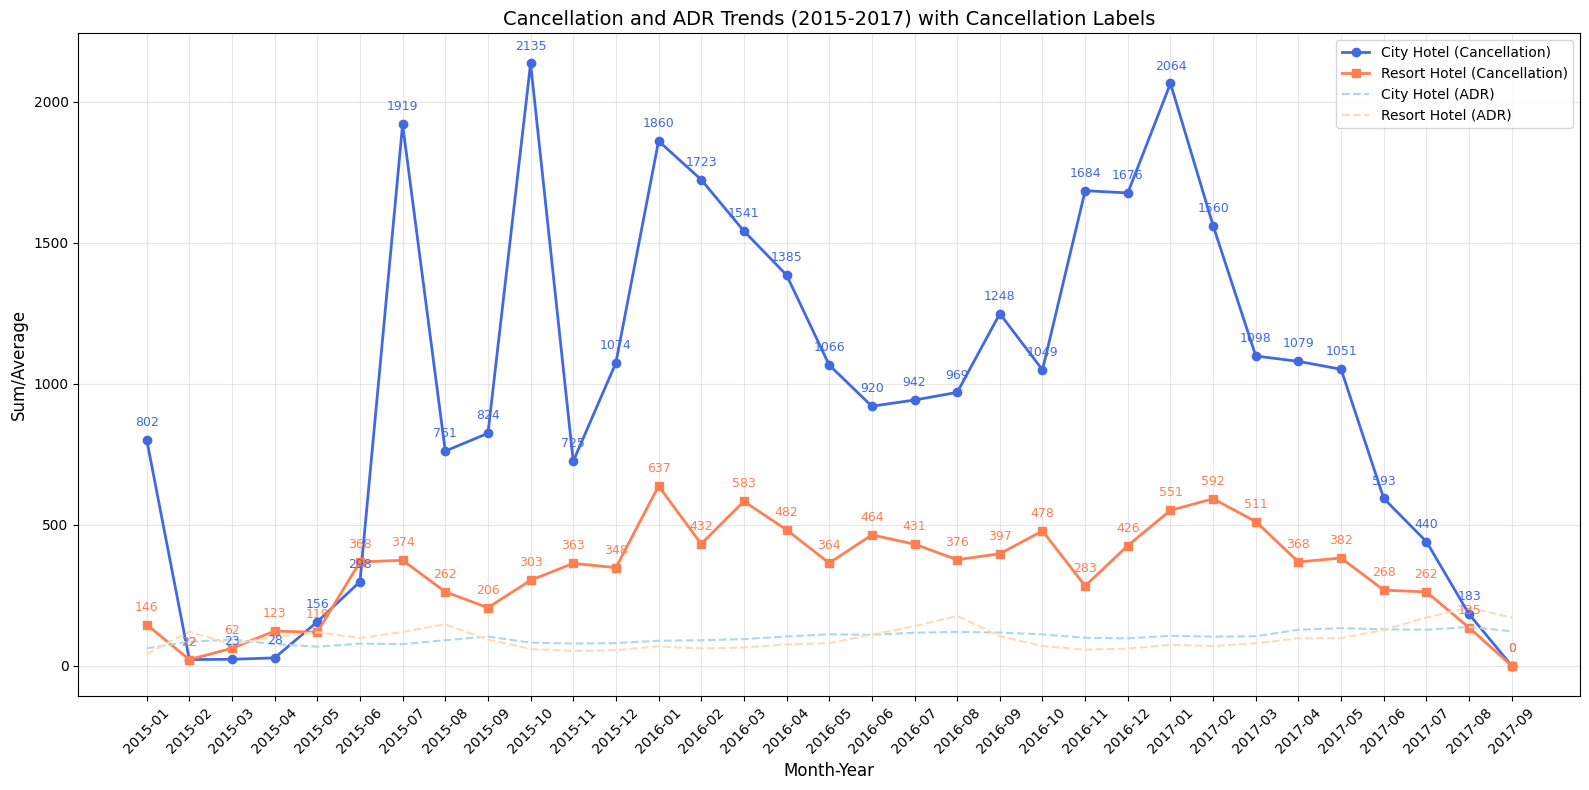

In [53]:
# Line Plot Visualization with Data Labels
plt.figure(figsize=(16, 8))

# Plot for City Hotel (Filtered)
city_hotel = metrics_filtered[metrics_filtered['hotel'] == 'City Hotel']
city_line = plt.plot(city_hotel['month_year'], city_hotel['total_canceled'],
         label='City Hotel (Cancellation)', marker='o', color='royalblue', linewidth=2)

# Add data labels for City Hotel cancellations
for x, y in zip(city_hotel['month_year'], city_hotel['total_canceled']):
    plt.annotate(f"{y}",
                (x, y),
                textcoords="offset points",
                xytext=(0, 10),  # 10 points vertical offset
                ha='center',
                fontsize=9,
                color='royalblue')

# Plot for Resort Hotel (Filtered)
resort_hotel = metrics_filtered[metrics_filtered['hotel'] == 'Resort Hotel']
resort_line = plt.plot(resort_hotel['month_year'], resort_hotel['total_canceled'],
         label='Resort Hotel (Cancellation)', marker='s', color='coral', linewidth=2)

# Add data labels for Resort Hotel cancellations
for x, y in zip(resort_hotel['month_year'], resort_hotel['total_canceled']):
    plt.annotate(f"{y}",
                (x, y),
                textcoords="offset points",
                xytext=(0, 10),  # 10 points vertical offset
                ha='center',
                fontsize=9,
                color='coral')

# Plot ADR lines (unchanged)
plt.plot(city_hotel['month_year'], city_hotel['avg_adr'],
         label='City Hotel (ADR)', linestyle='--', color='lightblue')
plt.plot(resort_hotel['month_year'], resort_hotel['avg_adr'],
         label='Resort Hotel (ADR)', linestyle='--', color='peachpuff')

# Formatting
plt.title('Cancellation and ADR Trends (2015-2017) with Cancellation Labels', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Sum/Average', fontsize=12)
plt.xticks(ticks=range(0, len(city_hotel)), labels=city_hotel['month_year'], rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

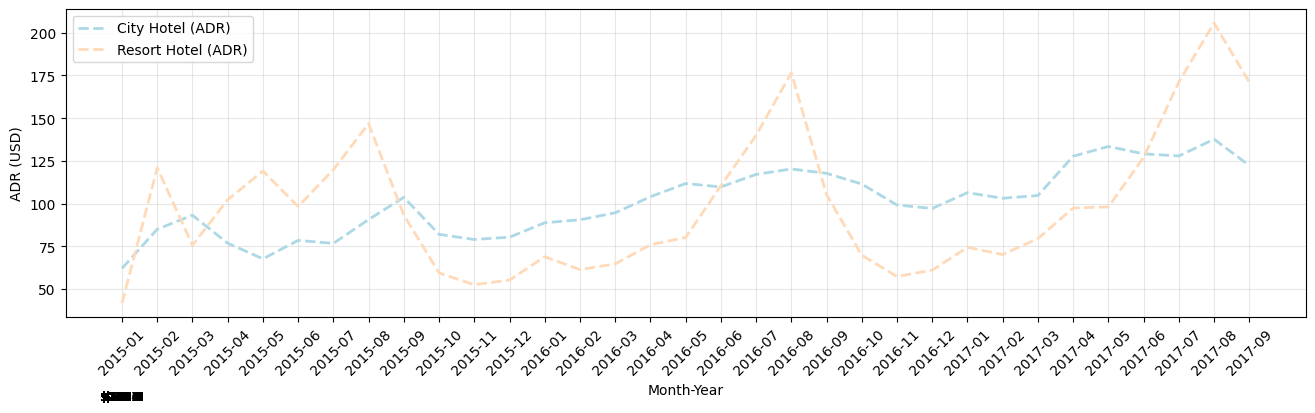

In [54]:
# Plot ADR only at full scale
plt.figure(figsize=(16, 4))
for hotel_type, color in [('City Hotel', 'lightblue'), ('Resort Hotel', 'peachpuff')]:
    subset = metrics_filtered[metrics_filtered['hotel'] == hotel_type]
    plt.plot(subset['month_year'], subset['avg_adr'],
             label=f'{hotel_type} (ADR)',
             linestyle='--', color=color, linewidth=2)
    for x, y in zip(subset['month_year'], subset['avg_adr']):
        plt.annotate(f"${y:.1f}", (x, y), xytext=(0,-15), ha='center', fontsize=9)
plt.ylabel('ADR (USD)')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Exploratory Data Analysis (EDA)
* Continuation of the previous EDA Dibimbing Final Project results. Check my Github: https://github.com/HudzaifahRizqi/Hotel-Reservation-Cancellation
*Separate data for each hotel type: `city_hotel` and `resort_hotel` take from the cleaned dataframe results `df_clean`

**- Heatmap Correlation Feature**
- **Main features for analysist** (controllable):
  1. `lead_time`
  2. `adr`
  3. `deposit_type`
  4. `required_car_parking_spaces`
  5. `total_of_special_requests`
  6. `meal` for 'With Meal' only
  7. `market_segment_online` for 'Online_TA' only
  8. `is_repeated_guest`

- **Specific features** for `city hotel` (controllable): `days_in_waiting_list`

- **Specific features** for `resort hotel` (controllable): `arrival_date_month`, `children`

In [75]:
df_co = df_clean.copy()

In [76]:
df_co.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119203 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119203 non-null  object 
 1   is_canceled                     119203 non-null  int64  
 2   lead_time                       119203 non-null  int64  
 3   arrival_date_year               119203 non-null  int64  
 4   arrival_date_month              119203 non-null  object 
 5   arrival_date_week_number        119203 non-null  int64  
 6   arrival_date_day_of_month       119203 non-null  int64  
 7   stays_in_weekend_nights         119203 non-null  int64  
 8   stays_in_week_nights            119203 non-null  int64  
 9   adults                          119203 non-null  int64  
 10  children                        119203 non-null  int64  
 11  babies                          119203 non-null  int64  
 12  meal                 

In [77]:
# Separate data by hotel type
city_hotel = df_co[df_co['hotel'] == 'City Hotel'].copy()
resort_hotel = df_co[df_co['hotel'] == 'Resort Hotel'].copy()

# Define month order for ordinal encoding
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Encode categorical features
for dataset in [city_hotel, resort_hotel]:
    dataset['deposit_type'] = dataset['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})
    dataset['market_segment_Online'] = (dataset['market_segment'] == 'Online TA').astype(int)
    dataset['with_meal'] = (dataset['meal'] == 'With Meal').astype(int)
    dataset['arrival_date_month_en'] = dataset['arrival_date_month'].apply(
        lambda x: month_order.index(x) + 1 if x in month_order else np.nan
    )

In [78]:
# Candidate features for City Hotel
city_features = [
    'is_canceled', 'lead_time', 'arrival_date_month_en', 'deposit_type', 'adr',
    'market_segment_Online', 'days_in_waiting_list', 'total_of_special_requests',
    'required_car_parking_spaces', 'children', 'with_meal'
]
city_corr = city_hotel[city_features].corr(method='pearson')

# Candidate features for Resort Hotel
resort_features = [
    'is_canceled', 'lead_time', 'arrival_date_month_en', 'deposit_type', 'adr',
    'market_segment_Online', 'days_in_waiting_list', 'total_of_special_requests',
    'required_car_parking_spaces', 'children', 'with_meal'
]
resort_corr = resort_hotel[resort_features].corr(method='pearson')

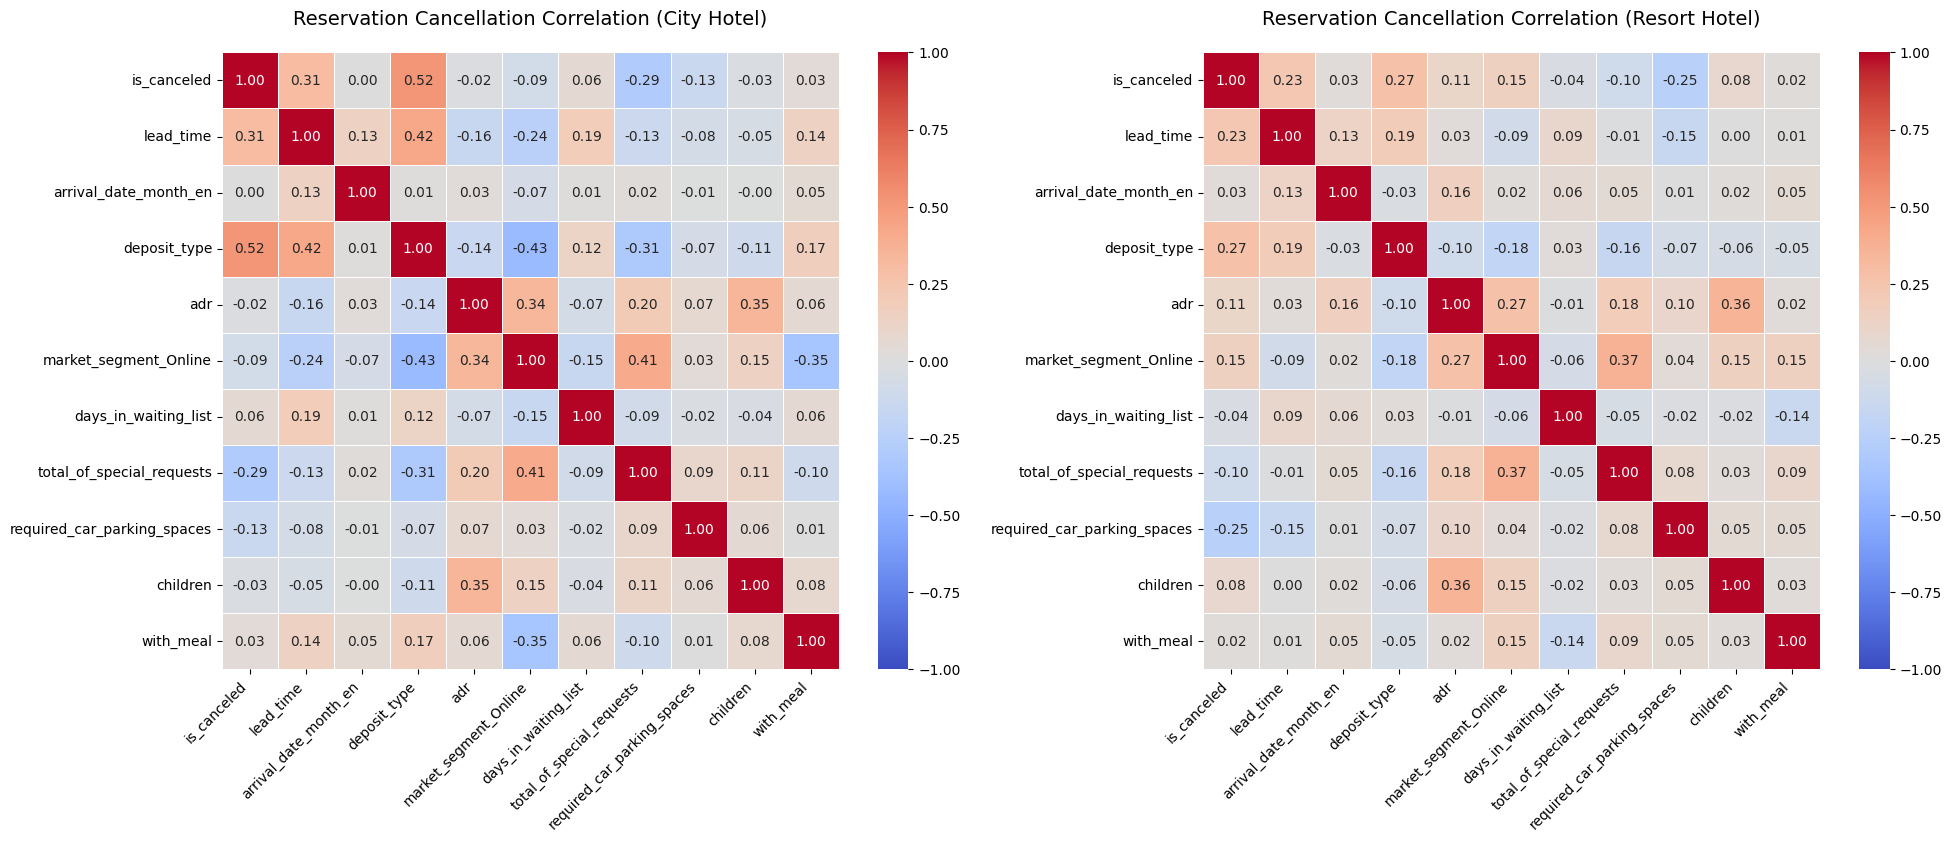

In [79]:
plt.figure(figsize=(20, 8))  # Lebar diperbesar untuk menampung 2 heatmap

# Heatmap City Hotel (Subplot 1)
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
sns.heatmap(
    city_corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    fmt=".2f",  # Format 2 desimal
    linewidths=0.5,
    square=True  # Agar sel heatmap berbentuk persegi
)
plt.title("Reservation Cancellation Correlation (City Hotel)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotasi label x
plt.yticks(rotation=0)  # Label y tetap horizontal

# Heatmap Resort Hotel (Subplot 2)
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
sns.heatmap(
    resort_corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Reservation Cancellation Correlation (Resort Hotel)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Atur layout dan tampilkan
plt.tight_layout()  # Mencegah tumpang tindih
plt.show()

## **Conclusion and Recommendations (for Controllable)**

1. `lead_time`
  - Reason for Significance: The longer the gap between booking and check-in, the higher the risk of guest plans changing.
  - City Hotel: Higher correlation (+0.31 vs +0.23 in Resort) because urban businesses are more dynamic.
  - Controllable: **Limit advance bookings or impose last-minute cancellation penalties.**

2. `deposit_type`
  - Reason for Significance: Refundable deposits give guests the flexibility to cancel without financial risk.
  - City Hotel: Very strong correlation (+0.52 vs +0.27 in Resort) because business guests tend to take advantage of refund policies.
  - Controllable: **Change deposit policies to non-refundable during peak seasons.**

3. `required_car_parking_spaces`
  - Reason for Significance: Parking availability is critical for guests with cars.
  - Strong Negative Correlation (-0.25 vs -0.13 in City): Parking facilities impact guest satisfaction.
  - Controllable: **Provide free parking or bundle it with your stay.**

4. `total_of_special_requests`
  - Reason for Significance: Guests with special requests (e.g. halal food, extra bed) are more committed.
  - City Hotel: Greater impact (correlation -0.29 vs -0.10 in Resort) as urban guests are more demanding of personalized service.
  - Controllable: **Promote “all-inclusive” packages with additional services.**

5. `market_segment_Online`
  - Reason for Significance: Bookings via Online Travel Agents (OTAs) are more likely to be cancelled due to ease of price comparison.
  - Resort Hotel: Higher correlation (+0.15 vs -0.09 in City) as guests tend to compare multiple vacation options.
  - Controllable: **Increase direct bookings through exclusive discounts.**

**Specific Features & Differences Between Hotels**
1. City Hotel: `days_in_waiting_list`
  - Reason for Significance: Long confirmation process reduces guest satisfaction (correlation +0.06).
  - Controllable: **Automate confirmation system to reduce waiting time.**

2. Resort Hotel: `arrival_date_month` & `children`
  - Reason for Significance:
    - `arrival_date_month`: High season (December-July) affects cancellations (correlation +0.03)
    - `children`: Families with children tend to be more stable (correlation +0.08).
  - Controllable: **Offer family packages during low season. "Kids Stay Free" promotion to increase loyalty.**

## **Thank You**

Open for discussion, criticism, suggestions and input. Please contact me:

- LinkedIn : www.linkedin.com/in/hudzaifahrizqikamil
- Email : hudzaifahrizqikamil@gmail.com
- Phone : (+62)85710864942